# ResNet

- **Training set**: LO_SARD102
- **Test/Validation set:** JTT
- **Features**: word2vec sequence (100)
- **Class imbalance processing**: undersampling

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report

X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_undersample_X_full_train.npy', mmap_mode='r')
Y_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_undersample_Y_full_train.npy', mmap_mode='r')

X_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_X_full_val.npy', mmap_mode='r')
Y_val = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD_w2vseq_Y_full_val.npy', mmap_mode='r')

X_test =  numpy.load('/mnt/md0/user/scheuererra68323/JTT_w2vseq_X.npy',  mmap_mode='r')
Y_test =  numpy.load('/mnt/md0/user/scheuererra68323/JTT_w2vseq_Y.npy',  mmap_mode='r')

print("Y_train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)

print("\nY_val:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)

print("\nY_test:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

train_gen = ResNetDataGenerator(_X=X_train, _y=Y_train, batch_size=512)
val_gen =   ResNetDataGenerator(_X=X_val,   _y=Y_val,   batch_size=512)
test_gen =  ResNetDataGenerator(_X=X_test,  _y=Y_test,  batch_size=512)

Y_train:
Counter({0.0: 5138, 1.0: 5138})
(10276, 100, 100)
(10276,)

Y_val:
Counter({0.0: 31975, 1.0: 1240})
(33215, 100, 100)
(33215,)

Y_test:
Counter({0.0: 21243, 1.0: 608})
(21851, 100, 100)
(21851,)


## Build & train keras model

In [6]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(100, 100, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=8,
                    verbose=True,
                    validation_data=val_gen
                   )

Epoch 1/8
21/21 [==============================] - 20s 936ms/step - loss: 3.2726 - accuracy: 0.7214 - val_loss: 590.4466 - val_accuracy: 0.9627
Epoch 2/8
21/21 [==============================] - 19s 908ms/step - loss: 0.3662 - accuracy: 0.9316 - val_loss: 7.4604 - val_accuracy: 0.8765
Epoch 3/8
21/21 [==============================] - 19s 912ms/step - loss: 0.0418 - accuracy: 0.9897 - val_loss: 2.1195 - val_accuracy: 0.9627
Epoch 4/8
21/21 [==============================] - 19s 917ms/step - loss: 0.0206 - accuracy: 0.9952 - val_loss: 1.5146 - val_accuracy: 0.9627
Epoch 5/8
21/21 [==============================] - 19s 916ms/step - loss: 0.0097 - accuracy: 0.9976 - val_loss: 0.6920 - val_accuracy: 0.9548
Epoch 6/8
21/21 [==============================] - 19s 919ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.4884 - val_accuracy: 0.9006
Epoch 7/8
21/21 [==============================] - 19s 919ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.5004 - val_accuracy: 0.8194
Epoc

## Evaluation

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     21243
         1.0       0.02      0.00      0.00       608

    accuracy                           0.97     21851
   macro avg       0.50      0.50      0.49     21851
weighted avg       0.95      0.97      0.96     21851

Confusion matrix:
[[21197    46]
 [  607     1]]

Confusion matrix (Percentages):
[[9.7007e+01 2.1100e-01]
 [2.7780e+00 5.0000e-03]]

Metrics:
Sensitivity (TPR): 0.001645
Specifity (TNR):   0.997835

FPR: 0.002165
FNR: 0.998355

Balanced accuracy: 0.499740

Test loss:	0.462782
Test accuracy:	0.970116


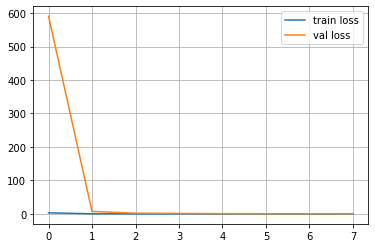

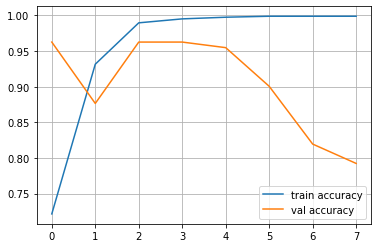

In [7]:
Y_pred = numpy.argmax( model.predict(test_gen) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()
score = model.evaluate(test_gen, verbose=False)
print('Test loss:\t{:.6f}'.format(score[0]))
print('Test accuracy:\t{:.6f}'.format(score[1]))

plot_loss(history)
plot_accuracy(history)

In [8]:
model.save('testJTT_ResNet_word2vec_undersample.h5')